# Background and Context

**Background and Context**

Businesses, including banks, face the challenge of customer churn, which refers to customers leaving one service provider and joining another. To address this issue, it is important for businesses to understand the factors that influence a customer's decision to leave. By identifying these factors, management can focus on improving the service in the areas that matter most to customers.

**Objective**

Create a neural network-based classifier that can accurately predict whether a bank customer will churn (leave) or not. This classifier will enable the bank to proactively identify customers who may be at risk of churning and take appropriate measures to retain them, ultimately helping the bank to retain customers and mitigate customer churn.

**About Dataset**

**RowNumber:** Corresponds to the record (row) number and has no effect on the output.

**CustomerId:** Contains random values and has no effect on customer leaving the bank.

**Surname:** The surname of a customer has no impact on their decision to leave the bank.

**CreditScore:** Can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography:** A customer’s location can affect their decision to leave the bank.

**Gender:** It’s interesting to explore whether gender plays a role in a customer leaving the bank.

**Age:** This is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure:** Refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance:** Also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts:** Refers to the number of products that a customer has purchased through the bank.

**HasCrCard:** Denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**IsActiveMember:** Active customers are less likely to leave the bank.

**EstimatedSalary:** As with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited:** Whether or not the customer left the bank.

## 1.1 Import  libraries & data

In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show") 

# Uyarı mesajlarını göstermemek için uyarı filtresi uygular. 
# Bu, kodu çalıştırdığınızda uyarı mesajlarının görünmesini engeller.


plt.rcParams["figure.figsize"] = (10,6)
# Matplotlib kütüphanesindeki grafik boyutlarını (figür boyutu) ayarlar. 
# Burada (10,6), genişliği 10 ve yüksekliği 6 birim olan bir çerçeve boyutu belirtilir.

sns.set_style("whitegrid")
# Seaborn kütüphanesindeki grid görünümünü beyaz bir arka planla ayarlar.

pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pandas kütüphanesindeki float formatını ayarlar. 
# Burada lambda fonksiyonu kullanılarak, ondalık sayıların görüntülenme formatı ayarlanır.

pd.set_option('display.max_rows', None)
# veri çerçevelerindeki tüm satırların görüntülenmesini istemiyorsanız, display.max_rows seçeneğini None olarak ayarlar.

pd.set_option('display.max_columns', None)
# veri çerçevelerindeki tüm sütunların görüntülenmesini istemiyorsanız, display.max_columns seçeneğini None olarak ayarlar.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import files

uploaded = files.upload()

Saving churn (1).csv to churn (1).csv


In [5]:
"""import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['churn (1).csv']))
print(df.head())"""

"import pandas as pd\nimport io\ndf = pd.read_csv(io.BytesIO(uploaded['churn (1).csv']))\nprint(df.head())"

In [6]:
df = pd.read_csv('churn (1).csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        7908

## 1.2 Exploratory Data Analysis and Visualization

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [8]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum().any()

False

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop(columns=["Surname", "RowNumber", 'CustomerId'], axis= 1, inplace= True)

0    7963
1    2037
Name: Exited, dtype: int64


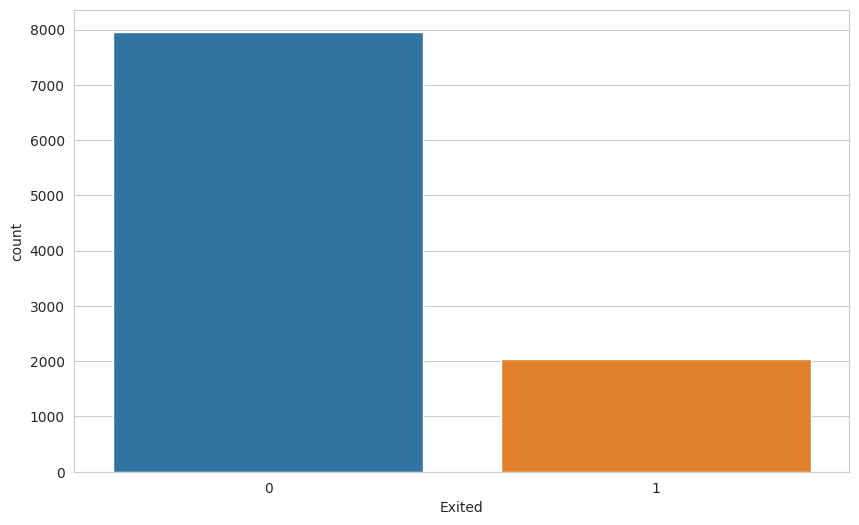

In [13]:
print(df.Exited.value_counts())
sns.countplot(x = df["Exited"]);

In [14]:
df.describe()
# outliers --> Balance, NumOfProducts?, HasCrCard?, IsActiveMember?, Exited?

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


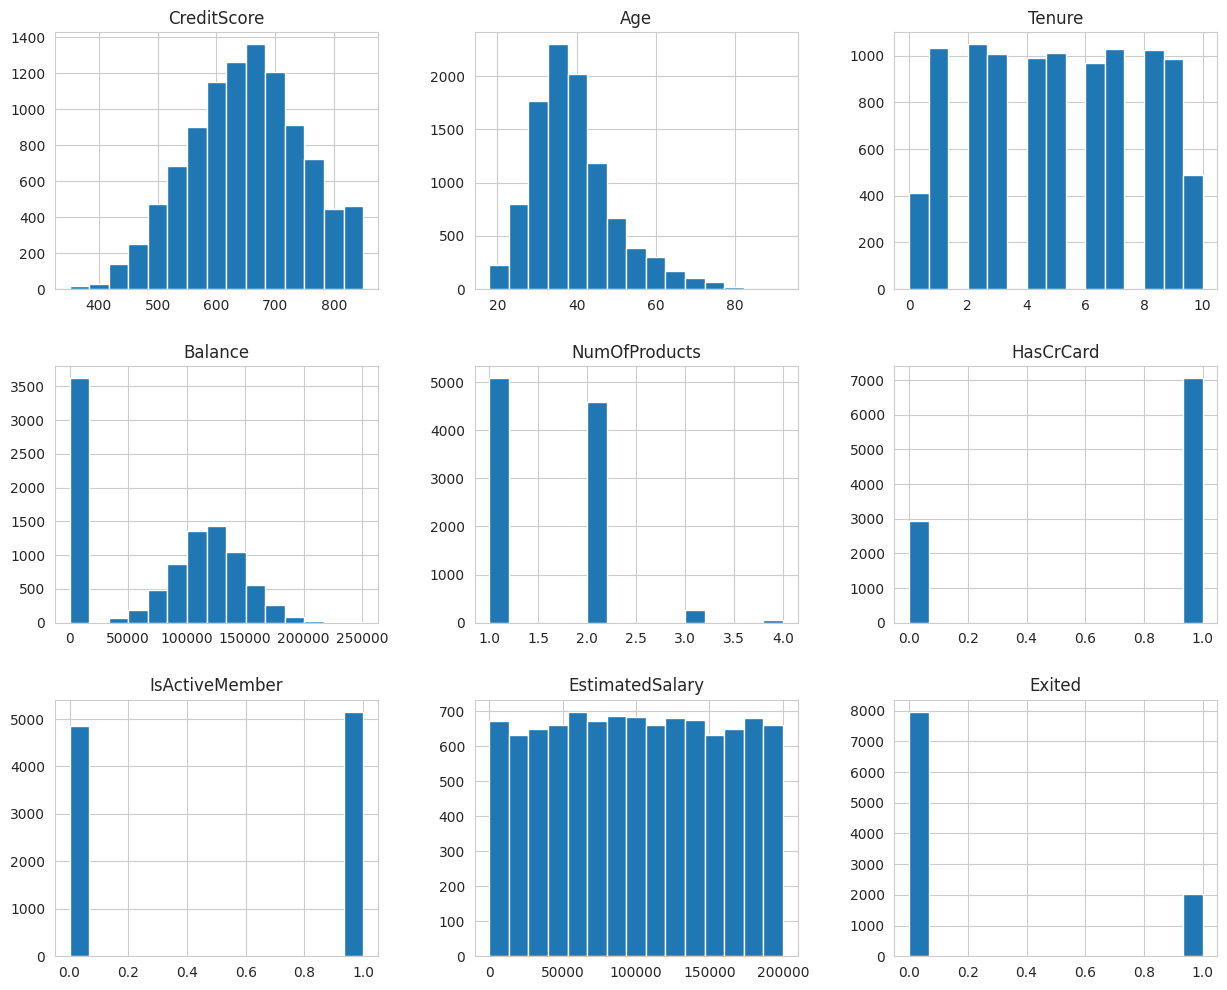

In [15]:
df.hist(figsize=(15, 12), bins=15);

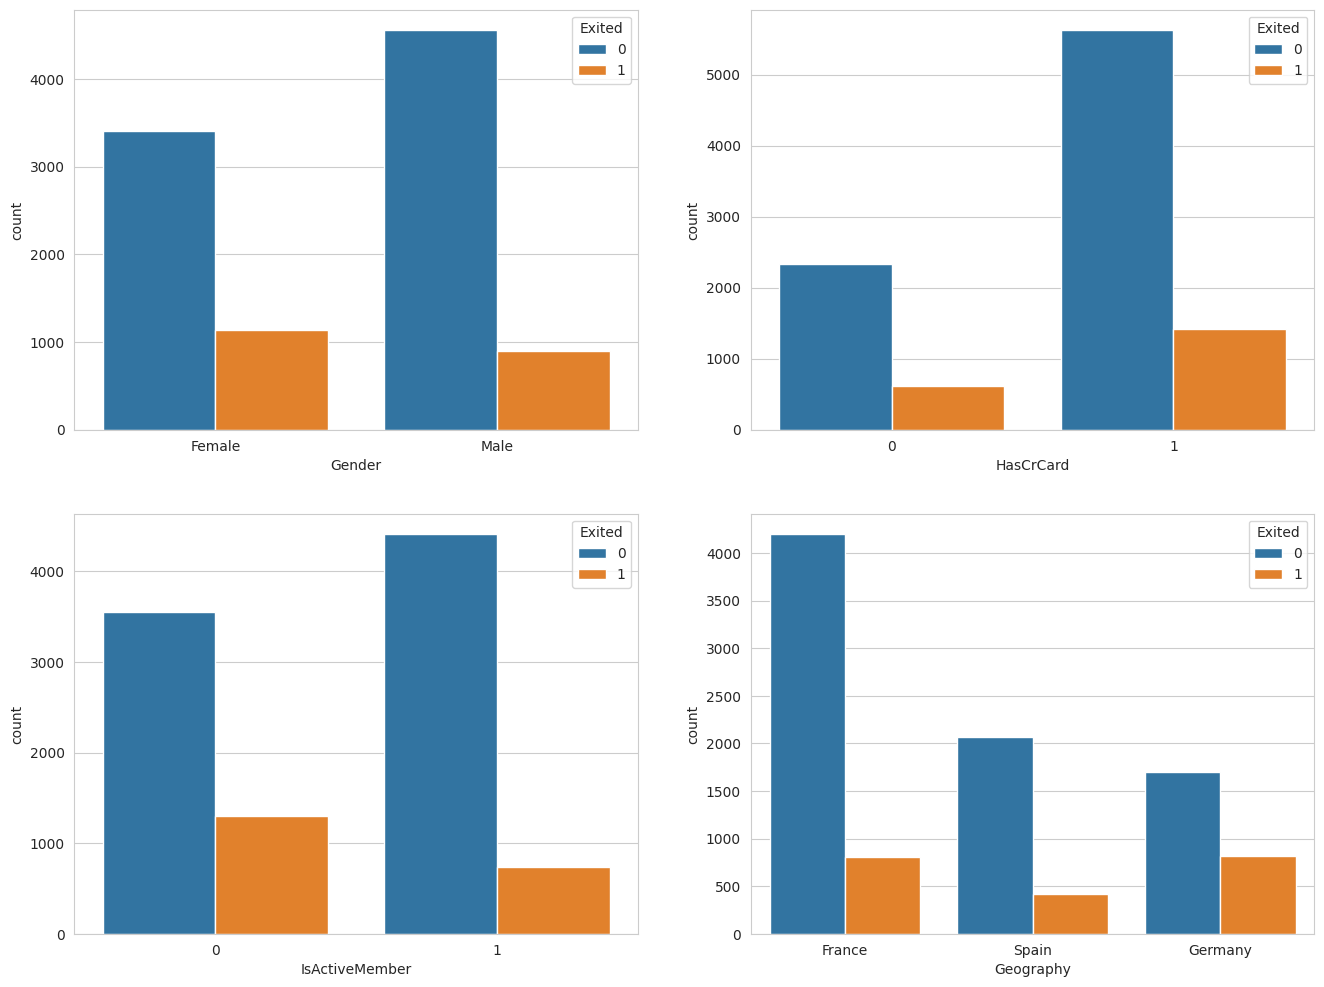

In [16]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

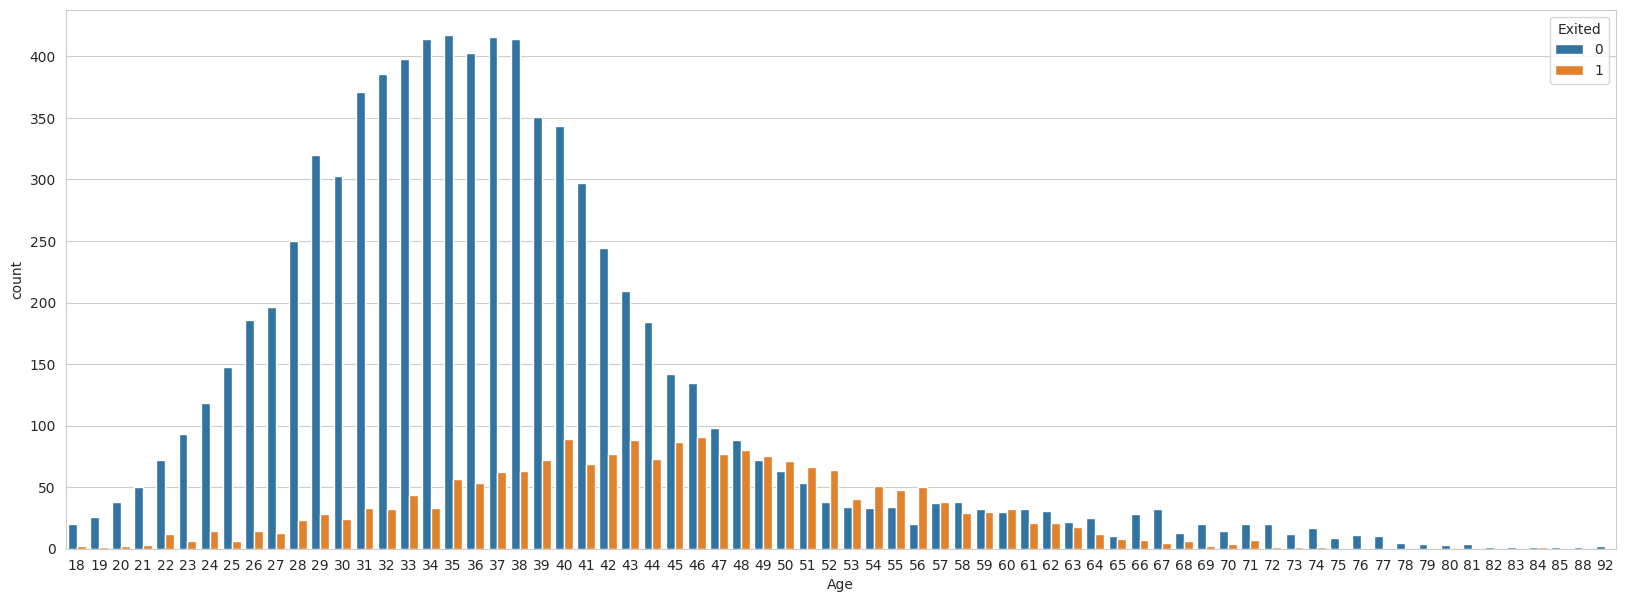

In [17]:
plt.figure(figsize=(20, 7))
sns.countplot(x = df.Age, hue=df.Exited);

<Axes: >

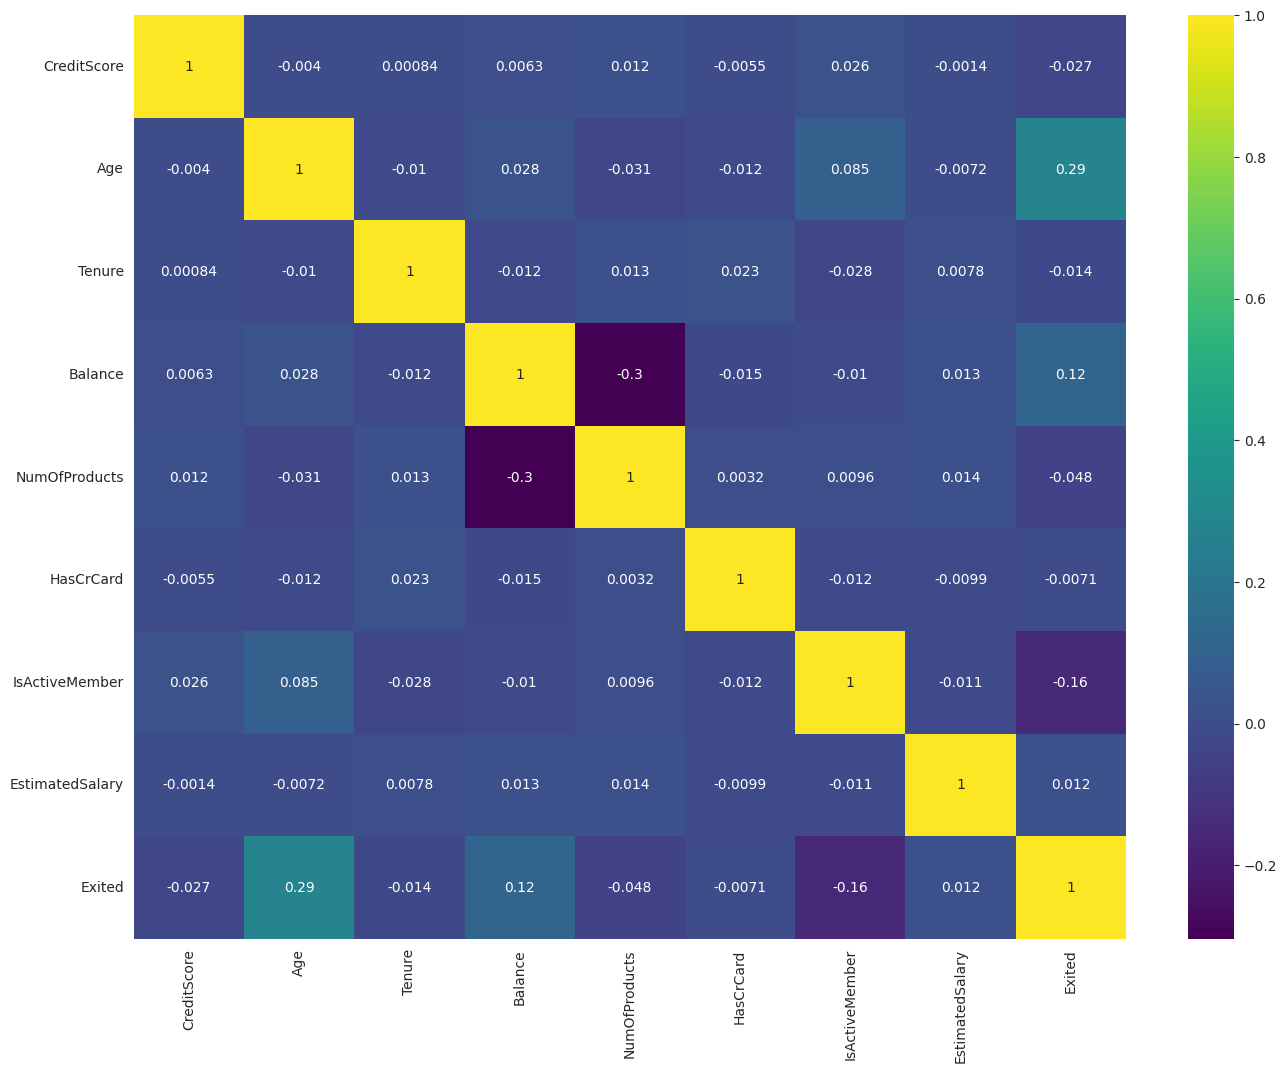

In [18]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<Axes: >

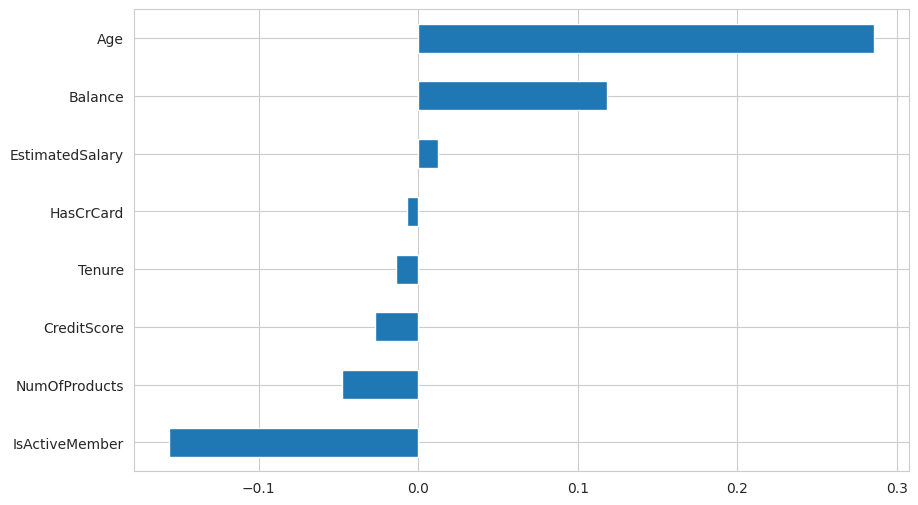

In [19]:
df.corr()['Exited'][:-1].sort_values().plot.barh()

## 1.3 Preprocessing of Data

In [20]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.5 MB/s eta 0:00:00


In [21]:
import pandas as pd
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Geography', 'Gender'])
df = encoder.fit_transform(df)

In [22]:
df.head(2)

,CreditScore,Geography_0,Geography_1,Gender_0,Gender_1,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,0,1,42,2,0.000,1,1,1,101348.880,1
1,608,1,0,0,1,41,1,83807.860,1,0,1,112542.580,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop("Exited", axis = 1)

y = df['Exited'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=42)


In [26]:
X_train.shape

(9000, 12)

In [27]:
y_train.shape

(9000,)

In [28]:
X_test.shape

(1000, 12)

In [29]:
from sklearn.preprocessing import MinMaxScaler 

In [30]:
scaler = MinMaxScaler() # Deep Learning de MinMax kullanmak daha iyidir!

In [31]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train.max()

1.0000000000000002

In [33]:
X_train.min()

0.0

In [34]:
X_test.max() 

1.0524797938281678

In [35]:
X_test.min()

0.0

## 1.4 Modelling & Model Performance

### 1.4.1 without class_weigth

In [36]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
import tensorflow as tf
from keras import models
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

In [38]:
from tensorflow.keras.optimizers import Adam

In [39]:
tf.random.set_seed(seed=42)
model = Sequential()
model.add(Dense(units = 4, input_dim = X_train.shape[1], activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid")) 

In [40]:
opt = Adam(learning_rate = 0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy", 
              metrics = ["Recall"])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping


In [42]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=25)

In [43]:
model.fit(x = X_train, 
          y = y_train, 
          validation_split=.1,
          batch_size = 64, 
          epochs = 300,
          verbose= 1,
          callbacks=[early_stop])

Epoch 1/300
127/127 [==============================] - 3s 9ms/step - loss: 0.6853 - recall: 0.2978 - val_loss: 0.6328 - val_recall: 0.0166
Epoch 2/300
127/127 [==============================] - 0s 4ms/step - loss: 0.6101 - recall: 0.0000e+00 - val_loss: 0.5874 - val_recall: 0.0000e+00
Epoch 3/300
127/127 [==============================] - 1s 6ms/step - loss: 0.5728 - recall: 0.0000e+00 - val_loss: 0.5564 - val_recall: 0.0000e+00
Epoch 4/300
127/127 [==============================] - 1s 7ms/step - loss: 0.5475 - recall: 0.0000e+00 - val_loss: 0.5356 - val_recall: 0.0000e+00
Epoch 5/300
127/127 [==============================] - 1s 9ms/step - loss: 0.5310 - recall: 0.0000e+00 - val_loss: 0.5222 - val_recall: 0.0000e+00
Epoch 6/300
127/127 [==============================] - 1s 8ms/step - loss: 0.5205 - recall: 0.0000e+00 - val_loss: 0.5137 - val_recall: 0.0000e+00
Epoch 7/300
127/127 [==============================] - 1s 4ms/step - loss: 0.5140 - recall: 0.0000e+00 - val_loss: 0.5085 - va

In [44]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 52        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.get_weights()

[array([[ 2.6908889e-01, -3.5490032e-02,  1.1771461e-01,  1.6377158e-01],
        [-2.0014735e-01, -2.6086360e-01, -8.4925577e-02,  9.5895015e-02],
        [-6.8102062e-01, -3.5602221e-01,  1.6977549e-02,  5.0852478e-02],
        [ 4.1983292e-01,  3.0196783e-01,  5.0650442e-01,  1.0697236e-01],
        [ 9.6282631e-02,  3.0820611e-01,  3.9789787e-01,  2.6300760e-02],
        [ 1.1077437e+00,  4.2680269e-01, -2.1530521e+00,  7.5683481e-01],
        [ 4.7360897e-01,  7.1114436e-02, -2.7995035e-02,  3.6038730e-02],
        [-7.2756761e-01,  5.7706100e-01, -1.2105292e-02, -2.5290689e-01],
        [-2.1707219e-01,  2.7781138e+00,  5.6710180e-02, -2.1152823e+00],
        [ 2.4820819e-01,  2.0532083e-02, -1.8119109e-03,  7.1447909e-02],
        [ 1.7693278e-01, -8.0243759e-02, -1.2981944e-01, -1.5159893e+00],
        [-2.6074144e-01, -1.3438741e-02,  9.5441183e-03,  1.7823456e-02]],
       dtype=float32),
 array([-0.02998467, -0.0422897 ,  0.6323803 ,  0.3938937 ], dtype=float32),
 array([[-0

In [46]:
saved_weights = model.save_weights('my_model_weights.h5')

In [47]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(12, 4) dtype=float32, numpy=
 array([[ 2.6908889e-01, -3.5490032e-02,  1.1771461e-01,  1.6377158e-01],
        [-2.0014735e-01, -2.6086360e-01, -8.4925577e-02,  9.5895015e-02],
        [-6.8102062e-01, -3.5602221e-01,  1.6977549e-02,  5.0852478e-02],
        [ 4.1983292e-01,  3.0196783e-01,  5.0650442e-01,  1.0697236e-01],
        [ 9.6282631e-02,  3.0820611e-01,  3.9789787e-01,  2.6300760e-02],
        [ 1.1077437e+00,  4.2680269e-01, -2.1530521e+00,  7.5683481e-01],
        [ 4.7360897e-01,  7.1114436e-02, -2.7995035e-02,  3.6038730e-02],
        [-7.2756761e-01,  5.7706100e-01, -1.2105292e-02, -2.5290689e-01],
        [-2.1707219e-01,  2.7781138e+00,  5.6710180e-02, -2.1152823e+00],
        [ 2.4820819e-01,  2.0532083e-02, -1.8119109e-03,  7.1447909e-02],
        [ 1.7693278e-01, -8.0243759e-02, -1.2981944e-01, -1.5159893e+00],
        [-2.6074144e-01, -1.3438741e-02,  9.5441183e-03,  1.7823456e-02]],
       dtype=float32)>,
 <tf.Variable 'dense

In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.685,0.298,0.633,0.017
1,0.610,0.000,0.587,0.000
2,0.573,0.000,0.556,0.000
3,0.547,0.000,0.536,0.000
4,0.531,0.000,0.522,0.000


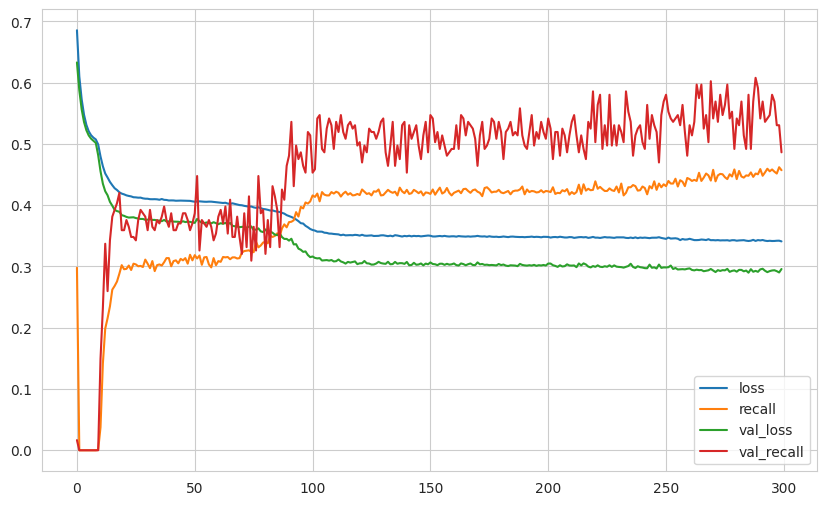

In [49]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

(0.0, 3000.0)

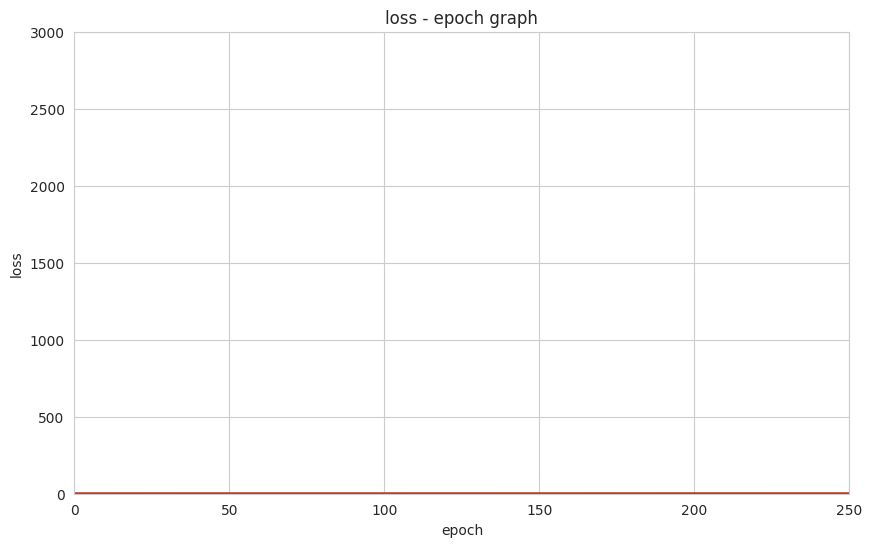

In [50]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

### 1.4.2 ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 5ms/step
[[777  19]
 [120  84]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       796
           1       0.82      0.41      0.55       204

    accuracy                           0.86      1000
   macro avg       0.84      0.69      0.73      1000
weighted avg       0.86      0.86      0.84      1000



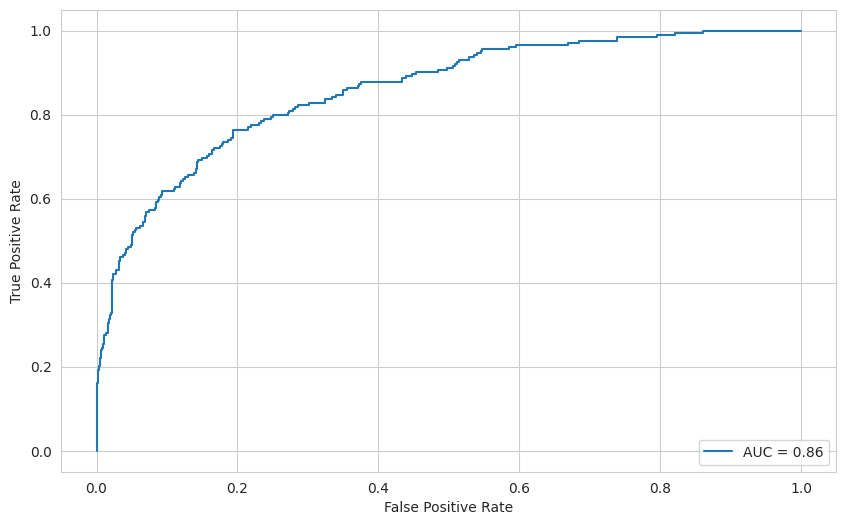

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Get binary classification probabilities on test data
y_pred_proba = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
roc_display.plot()
plt.show()


32/32 [==============================] - 0s 1ms/step


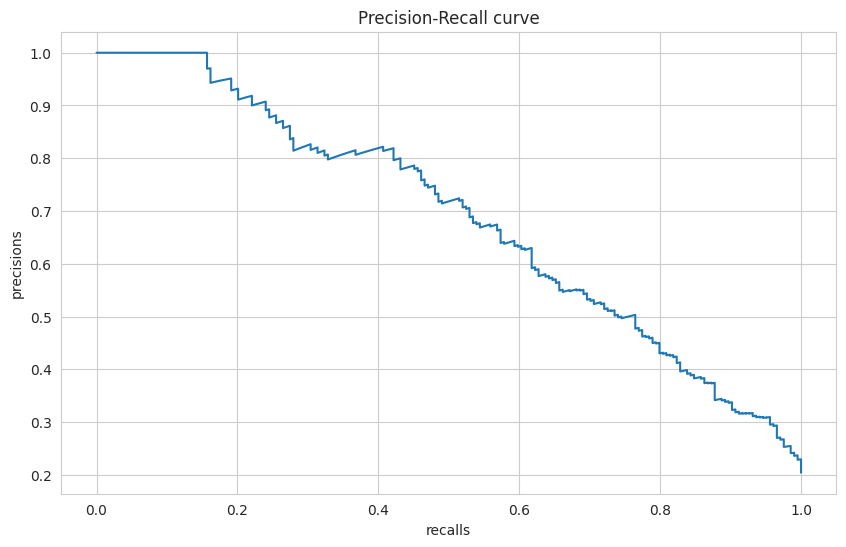

In [56]:
from sklearn.metrics import precision_recall_curve

y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [57]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, y_pred_proba)


0.6864505397627058

### 1.4.3 with class_weigth

In [58]:
from sklearn.utils import class_weight
class_weight

<module 'sklearn.utils.class_weight' from '/usr/local/lib/python3.10/dist-packages/sklearn/utils/class_weight.py'>

In [59]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [60]:
# model
tf.random.set_seed(seed=42)
model = Sequential()
model.add(Dense(units = 4, input_dim = X_train.shape[1], activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid")) 

opt = Adam(lr=0.002)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [61]:
from sklearn.utils.class_weight import compute_class_weight

# assuming y_train is your binary target variable
class_weights = compute_class_weight(class_weight='balanced', 
                                     classes=np.unique(y_train), 
                                     y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

# model fit
model.fit(X_train, 
          y_train, 
          validation_split=.1,
          epochs=300, 
          batch_size=64, 
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
127/127 [==============================] - 2s 7ms/step - loss: 0.6893 - recall: 0.3977 - val_loss: 0.6751 - val_recall: 0.5525
Epoch 2/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6774 - recall: 0.5630 - val_loss: 0.6665 - val_recall: 0.6851
Epoch 3/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6584 - recall: 0.6689 - val_loss: 0.6340 - val_recall: 0.6796
Epoch 4/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6367 - recall: 0.7058 - val_loss: 0.6016 - val_recall: 0.7072
Epoch 5/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6220 - recall: 0.7034 - val_loss: 0.6093 - val_recall: 0.7348
Epoch 6/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6103 - recall: 0.7022 - val_loss: 0.5520 - val_recall: 0.6630
Epoch 7/300
127/127 [==============================] - 0s 3ms/step - loss: 0.6029 - recall: 0.6955 - val_loss: 0.5930 - val_recall: 0.7072
Epoch 8/300
127/127 [======

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 52        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.get_weights()

[array([[ 4.60663676e-01,  2.20243439e-01,  8.82152393e-02,
          6.13692522e-01],
        [ 4.82998669e-01, -1.00099571e-01,  1.99388877e-01,
          4.31020744e-03],
        [-2.08561838e-01,  9.40914527e-02,  2.24848464e-01,
          1.15288354e-01],
        [ 4.89163905e-01, -4.29367185e-01,  3.48951757e-01,
          4.08486545e-01],
        [ 3.83877069e-01, -3.87104362e-01,  3.28449458e-01,
          2.48058841e-01],
        [ 7.99172699e-01,  5.90483546e-01,  1.77531183e-01,
         -5.49124777e-01],
        [ 3.22465777e-01, -2.20998332e-01,  1.79847295e-03,
         -1.44754380e-01],
        [ 1.84728533e-01,  5.50802350e-01, -5.88973045e-01,
         -5.36912642e-02],
        [ 1.06238675e+00,  1.77862346e+00, -3.24214363e+00,
         -6.91359162e-01],
        [ 7.17536092e-01,  1.63542390e-01,  4.42414768e-02,
          4.44935560e-01],
        [-1.85585059e-02,  3.24409723e-01, -2.81854700e-02,
          6.40884340e-01],
        [-2.58683324e-01,  2.62503594e-01, 

In [64]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(12, 4) dtype=float32, numpy=
 array([[ 4.60663676e-01,  2.20243439e-01,  8.82152393e-02,
          6.13692522e-01],
        [ 4.82998669e-01, -1.00099571e-01,  1.99388877e-01,
          4.31020744e-03],
        [-2.08561838e-01,  9.40914527e-02,  2.24848464e-01,
          1.15288354e-01],
        [ 4.89163905e-01, -4.29367185e-01,  3.48951757e-01,
          4.08486545e-01],
        [ 3.83877069e-01, -3.87104362e-01,  3.28449458e-01,
          2.48058841e-01],
        [ 7.99172699e-01,  5.90483546e-01,  1.77531183e-01,
         -5.49124777e-01],
        [ 3.22465777e-01, -2.20998332e-01,  1.79847295e-03,
         -1.44754380e-01],
        [ 1.84728533e-01,  5.50802350e-01, -5.88973045e-01,
         -5.36912642e-02],
        [ 1.06238675e+00,  1.77862346e+00, -3.24214363e+00,
         -6.91359162e-01],
        [ 7.17536092e-01,  1.63542390e-01,  4.42414768e-02,
          4.44935560e-01],
        [-1.85585059e-02,  3.24409723e-01, -2.81854700e-02,
 

<Axes: >

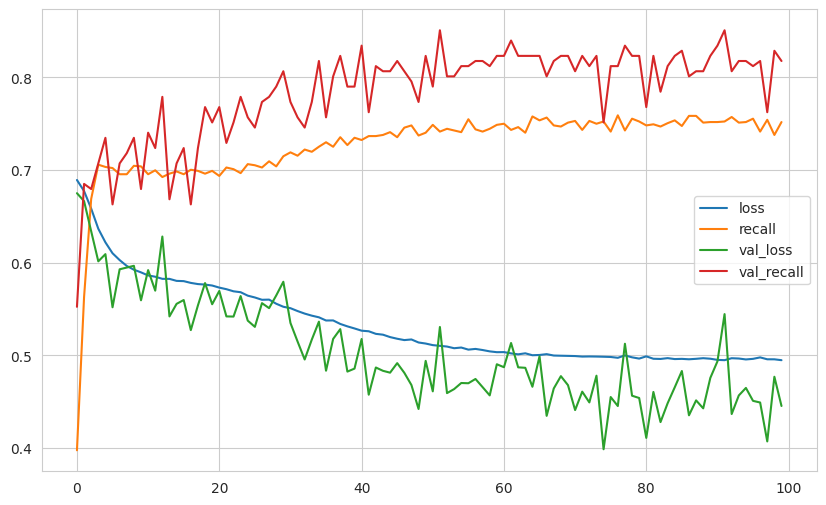

In [65]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

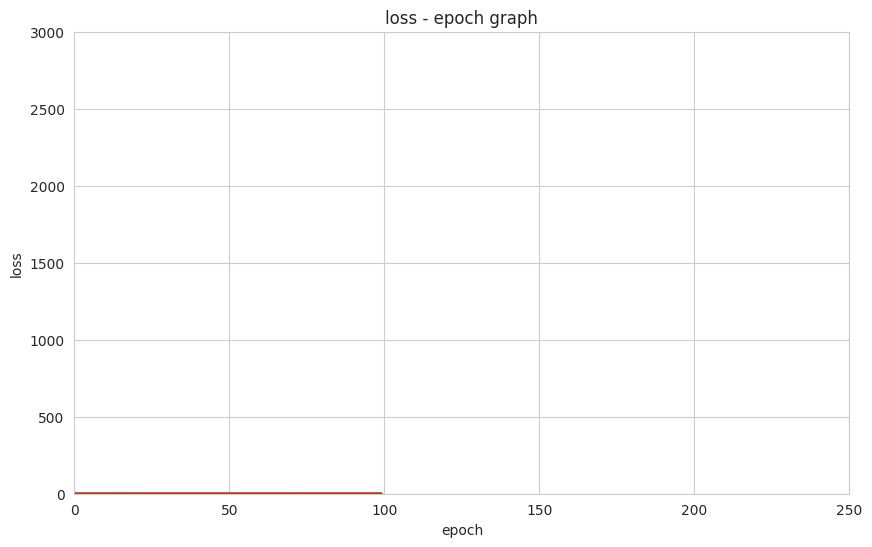

In [66]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

### 1.4.4 ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

32/32 [==============================] - 0s 1ms/step


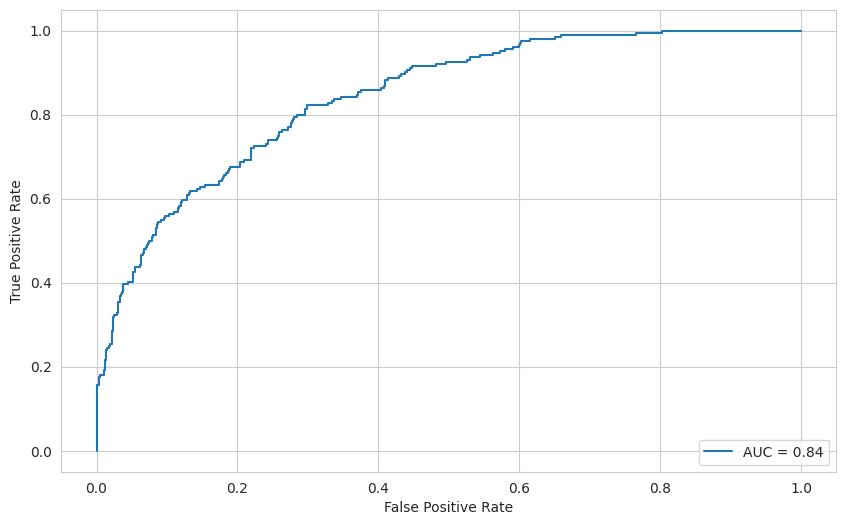

In [67]:

# Get binary classification probabilities on test data
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute false positive rate, true positive rate, and thresholds for ROC curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
roc_display.plot()
plt.show()

In [68]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#      precision    recall  f1-score   support

#  0       0.86      0.97      0.92       796
#  1       0.79      0.41      0.54       204


32/32 [==============================] - 0s 1ms/step
[[612 184]
 [ 56 148]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       796
           1       0.45      0.73      0.55       204

    accuracy                           0.76      1000
   macro avg       0.68      0.75      0.69      1000
weighted avg       0.82      0.76      0.78      1000



In [69]:
average_precision_score(y_test, y_pred_prob)   

0.6305986100298464

## 1.5 Model Performance

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [71]:
model.evaluate(X_train, y_train, verbose=0) # model oluştururken loss'a hangi skoru verdiysem onun sonucunu verir. "mse"
# arka planda x ve y testi predict alıp sonra evaluate sonucunu veriyor

[0.47623753547668457, 0.7452263832092285]

In [72]:
model.evaluate(X_test, y_test, verbose=0)

[0.48064905405044556, 0.7254902124404907]

In [73]:
model.evaluate(X_test, y_test, verbose=2)

32/32 - 0s - loss: 0.4806 - recall: 0.7255 - 60ms/epoch - 2ms/step


[0.48064905405044556, 0.7254902124404907]

In [74]:
y_pred = model.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [76]:
explained_variance_score(y_test, y_pred) # R2 skorunu verir 1 e yakınsa iyidir

0.2336192807070152

In [77]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
111,0,0.690
928,0,0.067
538,0,0.391
108,0,0.369
9,1,0.221
880,1,0.766
447,0,0.223
68,0,0.754
609,0,0.134
866,0,0.607


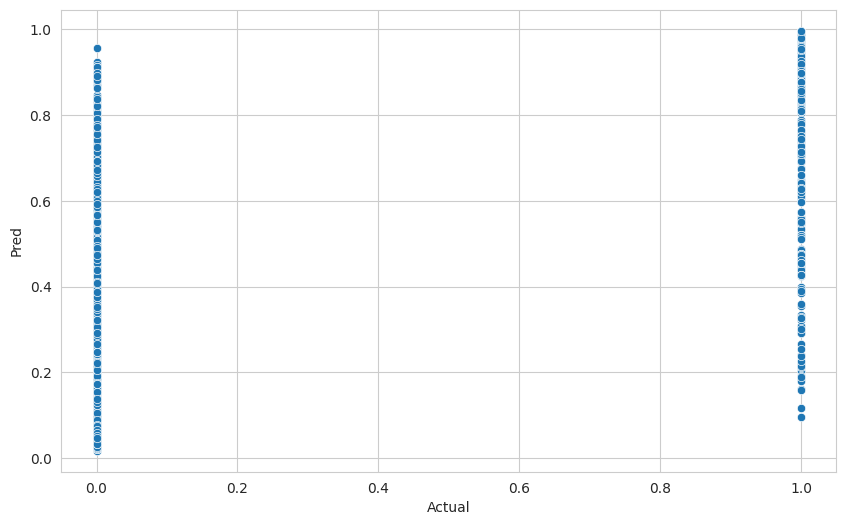

In [78]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare);

In [79]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [80]:
eval_metric(y_test, y_pred)

r2_score: 0.02082292937678687 
mae: 0.3210208204258233 
mse: 0.15900268943607984 
rmse: 0.3987514130834897


## 1.6 Final Model and Deployment

In [81]:
scaler = MinMaxScaler().fit(X)

In [82]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [83]:
X_scaled = scaler.transform(X)

In [84]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu", 
                      input_dim = X_train.shape[1]))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid"))

from tensorflow.keras.optimizers import legacy

opt = legacy.Adam(learning_rate=0.002)

final_model.compile(optimizer = opt, 
                    loss = "binary_crossentropy", 
                    metrics = ["Recall"])

final_model.fit(x = X_train, 
                y = y_train,  
                epochs = 300,  
                validation_data=(X_test, y_test), 
                callbacks=[early_stop],
                batch_size=64,
                verbose=1,
                class_weight=class_weights)

Epoch 1/300
141/141 [==============================] - 5s 13ms/step - loss: 0.6726 - recall: 0.6727 - val_loss: 0.6711 - val_recall: 0.6471
Epoch 2/300
141/141 [==============================] - 1s 4ms/step - loss: 0.6402 - recall: 0.6705 - val_loss: 0.6377 - val_recall: 0.6225
Epoch 3/300
141/141 [==============================] - 1s 7ms/step - loss: 0.6191 - recall: 0.6628 - val_loss: 0.6537 - val_recall: 0.7108
Epoch 4/300
141/141 [==============================] - 1s 5ms/step - loss: 0.5964 - recall: 0.6858 - val_loss: 0.6167 - val_recall: 0.7010
Epoch 5/300
141/141 [==============================] - 1s 7ms/step - loss: 0.5744 - recall: 0.6994 - val_loss: 0.5548 - val_recall: 0.6471
Epoch 6/300
141/141 [==============================] - 0s 2ms/step - loss: 0.5596 - recall: 0.7070 - val_loss: 0.5906 - val_recall: 0.7255
Epoch 7/300
141/141 [==============================] - 0s 2ms/step - loss: 0.5446 - recall: 0.7158 - val_loss: 0.5675 - val_recall: 0.7206
Epoch 8/300
141/141 [=====

<Axes: >

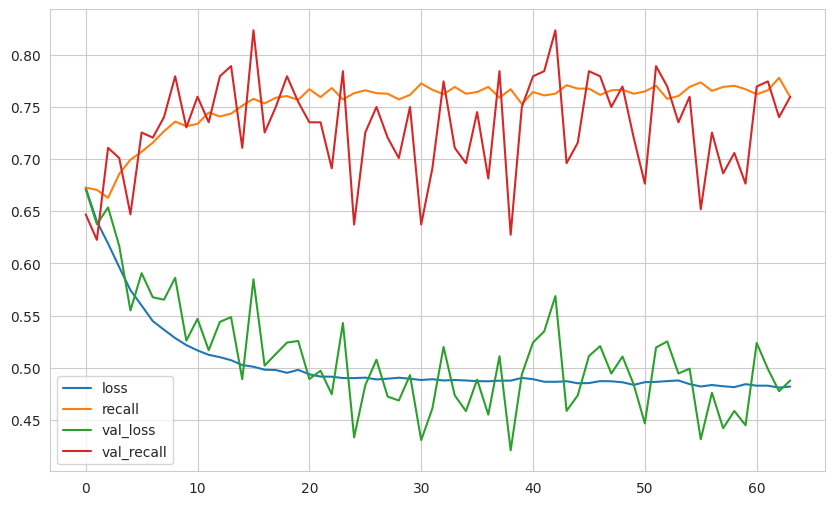

In [85]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot()

In [86]:
loss, recall = final_model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

#loss :  0.43118199706077576
#recall :  0.7696078419685364

loss :  0.4877435266971588
recall :  0.7598039507865906


In [87]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[592 204]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       796
           1       0.43      0.76      0.55       204

    accuracy                           0.75      1000
   macro avg       0.68      0.75      0.69      1000
weighted avg       0.82      0.75      0.77      1000



In [88]:
final_model.save('model_churn.h5')

## 1.6.1 Prediction

In [89]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore          619.000
Geography_0            0.000
Geography_1            1.000
Gender_0               0.000
Gender_1               1.000
Age                   42.000
Tenure                 2.000
Balance                0.000
NumOfProducts          1.000
HasCrCard              1.000
IsActiveMember         1.000
EstimatedSalary   101348.880
Name: 0, dtype: float64

In [90]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 12))
single_customer

array([[0.538     , 0.        , 1.        , 0.        , 1.        ,
        0.32432432, 0.2       , 0.        , 0.        , 1.        ,
        1.        , 0.50673489]])

In [91]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 22ms/step


array([[1]], dtype=int32)

In [92]:
df["Exited"].iloc[0]

1

## 1.7 Comparison with ML

### 1.7.1 Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[558 238]
 [ 67 137]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.79       796
           1       0.37      0.67      0.47       204

    accuracy                           0.69      1000
   macro avg       0.63      0.69      0.63      1000
weighted avg       0.79      0.69      0.72      1000



### 1.7.2 Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[766  30]
 [119  85]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.74      0.42      0.53       204

    accuracy                           0.85      1000
   macro avg       0.80      0.69      0.72      1000
weighted avg       0.84      0.85      0.83      1000

